# Digit Recognition with ANN on MNIST Dataset

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

2024-02-16 08:59:10.637380: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 08:59:10.637520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 08:59:10.816440: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [4]:
X = train_df.drop('label', axis=1)
y = train_df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28))

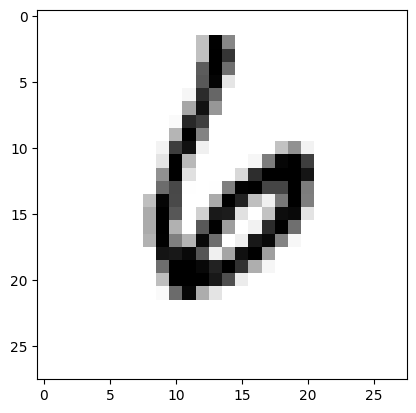

In [6]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [7]:
y_train[0]

6

## Normalizing the Data

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

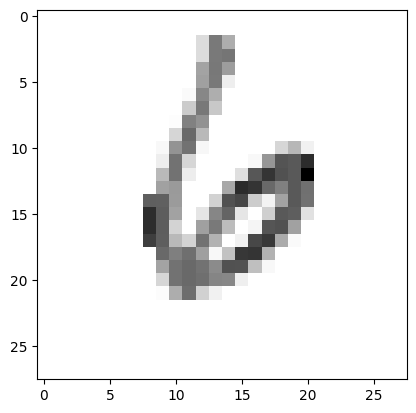

In [9]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

## Building an ANN

In [10]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Epoch 1/20
840/840 [==============================] - 5s 4ms/step - loss: 0.4288 - accuracy: 0.8754 - val_loss: 0.2346 - val_accuracy: 0.9314
Epoch 2/20
840/840 [==============================] - 4s 4ms/step - loss: 0.1826 - accuracy: 0.9455 - val_loss: 0.1762 - val_accuracy: 0.9494
Epoch 3/20
840/840 [==============================] - 4s 4ms/step - loss: 0.1288 - accuracy: 0.9609 - val_loss: 0.1493 - val_accuracy: 0.9563
Epoch 4/20
840/840 [==============================] - 4s 4ms/step - loss: 0.0945 - accuracy: 0.9715 - val_loss: 0.1445 - val_accuracy: 0.9580
Epoch 5/20
840/840 [==============================] - 3s 4ms/step - loss: 0.0723 - accuracy: 0.9775 - val_loss: 0.1368 - val_accuracy: 0.9637
Epoch 6/20
840/840 [==============================] - 4s 4ms/step - loss: 0.0559 - accuracy: 0.9825 - val_loss: 0.1356 - val_accuracy: 0.9634
Epoch 7/20
840/840 [==============================] - 4s 5ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 0.1297 - val_accuracy: 0.9659
Epoch 

In [14]:
y_prob = model.predict(X_test)

263/263 [==============================] - 1s 2ms/step


In [15]:
y_pred = y_prob.argmax(axis=1)

In [16]:
accuracy_score(y_test, y_pred)

0.9688095238095238

Our model achieved a validation accuracy of around 0.97, showing strong performance in recognizing digits from the MNIST dataset.

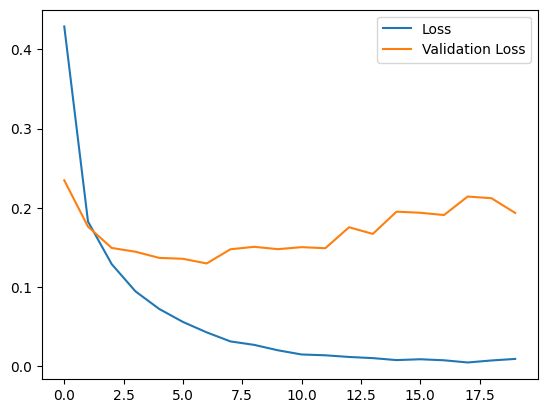

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])

The loss is slightly smaller than the validation loss, it indicates that the model is performing slightly better on the training data compared to the unseen validation data. 

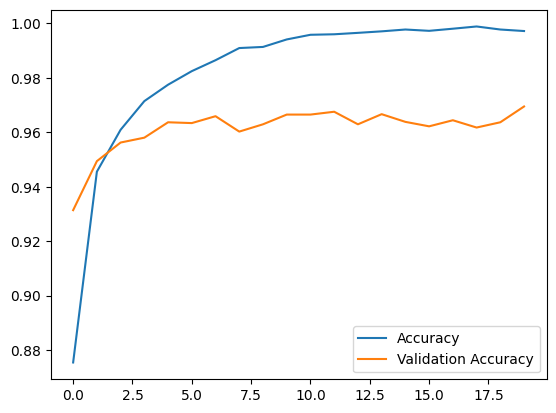

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])

The training accuracy is slightly larger than the validation accuracy, it indicates that the model is performing slightly better on the training data compared to the unseen validation data. 

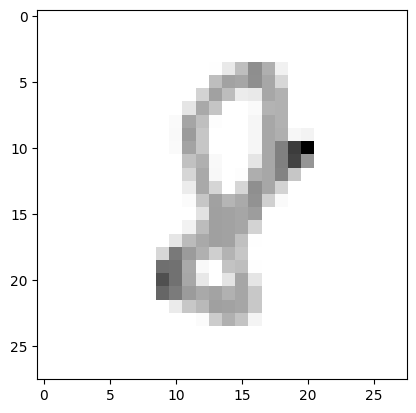

In [19]:
plt.imshow(X_test[0], cmap = plt.cm.binary)

In [20]:
model.predict(X_test[0].reshape((1,28,28))).argmax()

1/1 [==============================] - 0s 27ms/step


8

In [21]:
test_df = np.reshape(test_df, (test_df.shape[0],28,28))

In [22]:
test_pred = model.predict(test_df).argmax(axis=1)

875/875 [==============================] - 2s 2ms/step


In [23]:
submission_df = pd.DataFrame(
{'ImageId': np.arange(1, len(test_df)+1),
    'Label': test_pred}
)

In [24]:
submission_df

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [25]:
submission_df.to_csv('submission.csv', index=False)